## Project : 2 : ML(All Modules : ML1,ML2,ML3) ##

## Case Study on : *Halloween Candy Power* ##

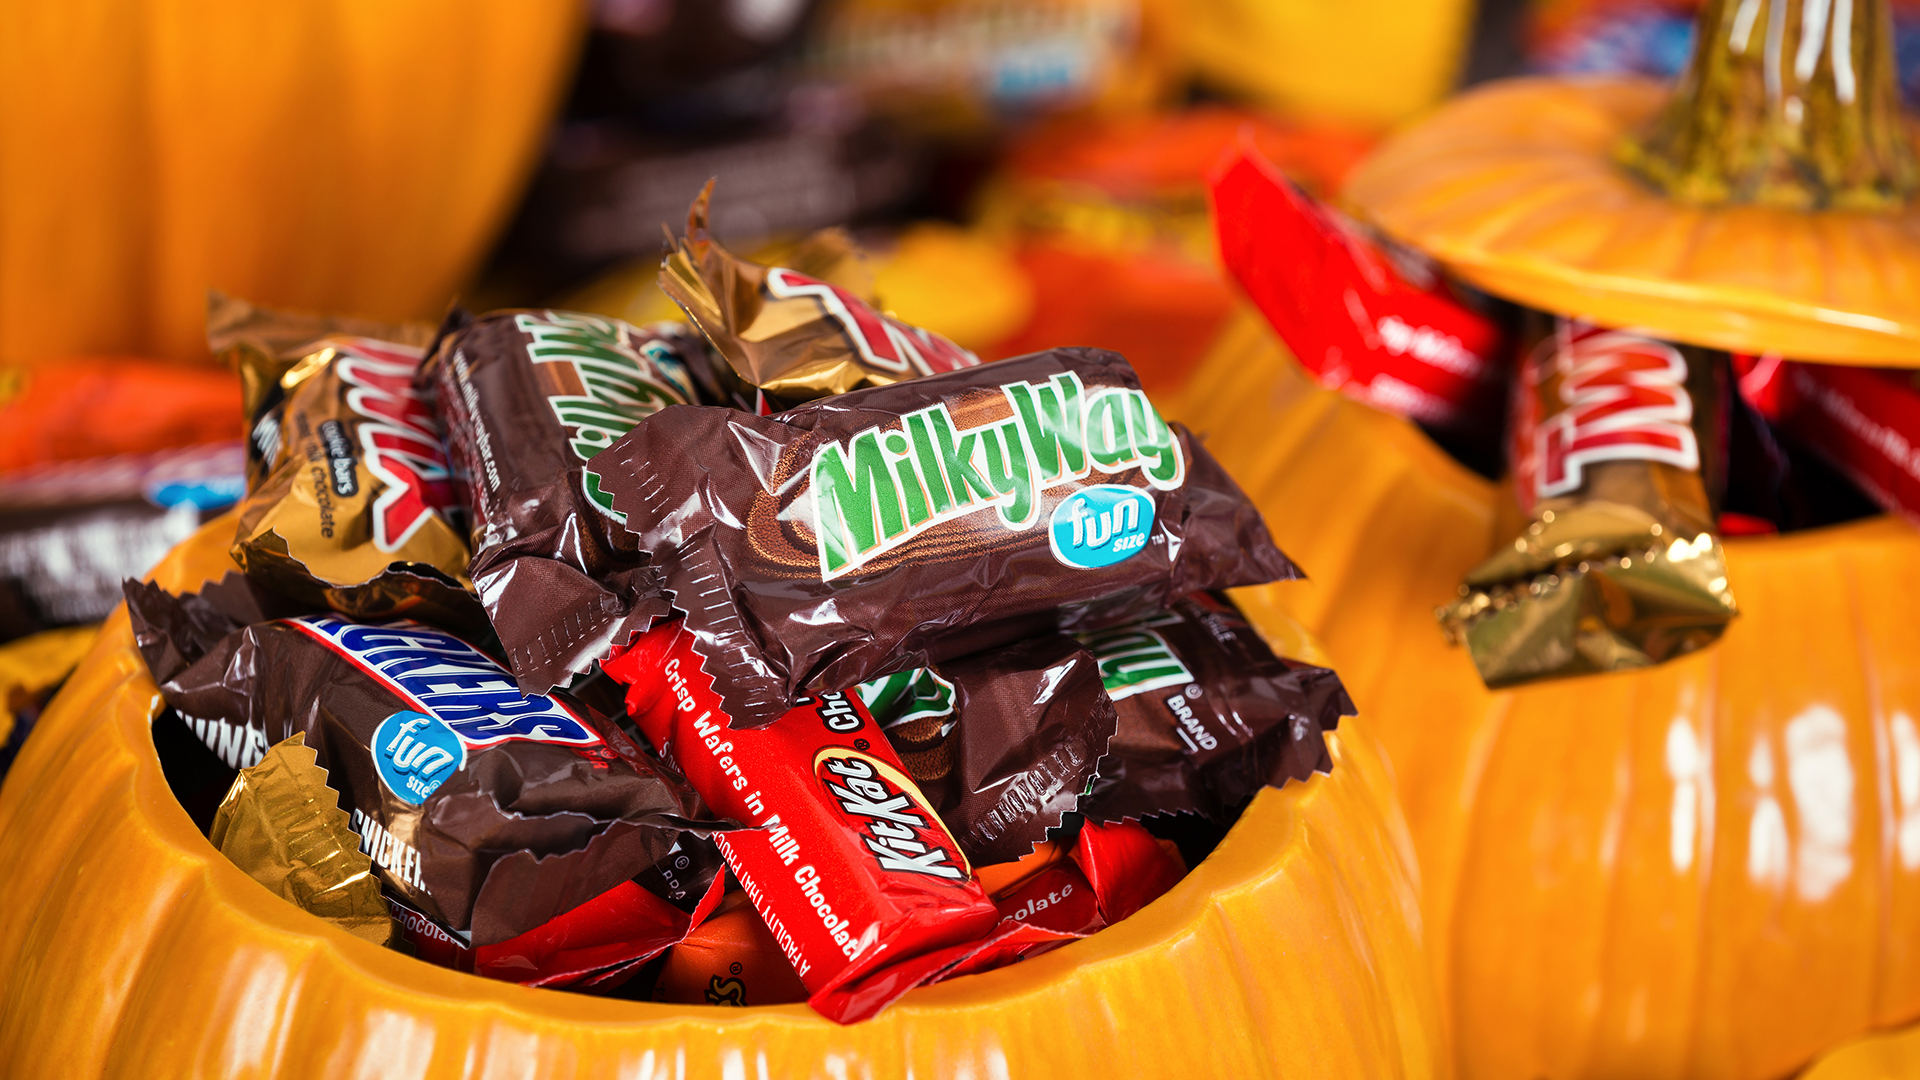

### Table Content:-

1. [Project Brief](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Data Loading and Description](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Applying Machine Learning Applications](#section5)<br>
   - 5.1 [Linear Regression](#section501)<br>
   - 5.2 [PCA](#section502)<br>
   - 5.3 [K-Mean Clustering](#section503)<br>
6. [Conclusion](#section6)<br>

<a id=section1></a>
### Project brief:

**Candy information collected to get the best (or most popular) Halloween candy**

- Collection Methodology : Online collection (http://walthickey.com/2017/10/18/whats-the-best-halloween-candy )
- Attribute information : 
    - Various candy features: Chocolate , Fruity , Caramel , Peanutyalmondy , Nougat , Crispedricewafer , Hard , Bar and                                     Pluribus
- Binary candy features are captured with 1- “Yes” and 2- “No”
- Various % points: Sugar % , Price % and Win % 
- Sample : Overall 269,000 matchups were collected from 8,371 different IP addresses. 

**CANDY-DATA.CSV** contains 85 records with 9 candy features and 3 % points
- **Objective** : To identify the best or most popular Halloween candy attribute.

<a id=section2></a>
### Problem Statement:

To identify the best or most popular Halloween candy attribute.

##### Loading various Python Libraries #####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
from IPython.display import display

import os # accessing directory structure
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# allow plots to appear directly in the notebook
get_ipython().run_line_magic('matplotlib', 'inline')


##### Some Notebook Settings #####

In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

<a id=section3></a>
### Data Loading and Description

**Loading Database:** (downloaded data from GitHub)

* Data downloaded and kept in local drive *

In [3]:
df = pd.read_csv('candy-data.csv', encoding='utf-8')
df.drop_duplicates(inplace=True) # drop duplicates if any.
df.shape # num rows x num columns.

(85, 13)

#### Data Preparation ###

* Checking of missing values *

In [4]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

winpercent          0.0
pricepercent        0.0
sugarpercent        0.0
pluribus            0.0
bar                 0.0
hard                0.0
crispedricewafer    0.0
nougat              0.0
peanutyalmondy      0.0
caramel             0.0
fruity              0.0
chocolate           0.0
competitorname      0.0
dtype: float64

**Observation:-** No missing values in the dataset

In [5]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,66.97
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,67.60
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,32.26
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,46.12
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34


<a id=section4></a>
## Exploratory Data Analysis

In [6]:
df.shape

(85, 13)

In [7]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [8]:
df.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,66.97
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,67.60
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,32.26
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,46.12
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34


In [9]:
df.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 9.3+ KB


In [11]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00
mean,0.44,0.45,0.16,0.16,0.08,0.08,0.18,0.25,0.52,0.48,0.47,50.32
std,0.50,0.50,0.37,0.37,0.28,0.28,0.38,0.43,0.50,0.28,0.29,14.71
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,22.45
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.26,39.14
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.47,0.47,47.83
75%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.73,0.65,59.86
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,84.18


In [12]:
df.columns = map(str.lower, df.columns)

**Observations :**

- Total sample of 85 with 2 types of attributes: 
    - Various candy features: Total 9 features which are categorical
          - Chocolate  
          - Fruity 
          - Caramel  
          - Peanutyalmondy  
          - Nougat 
          - Crispedricewafer  
          - Hard 
          - Bar 
          - Pluribus 
    - Various % points: Total 3 "%" points which are numeric values
          - Sugar %  
          - Price % 
          - Win %  

- Features by Description : 

    - 01) chocolate: Does it contain chocolate?
    - 02) fruity: Is it fruit flavored?
    - 03) caramel: Is there caramel in the candy?
    - 04) peanutalmondy: Does it contain peanuts, peanut butter or almonds?
    - 05) nougat: Does it contain nougat?
    - 06) crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
    - 07) hard: Is it a hard candy?
    - 08) bar: Is it a candy bar?
    - 09) pluribus: Is it one of many candies in a bag or box?
    - 10) sugarpercent: The percentile of sugar it falls under within the data set
    - 11) pricepercent: The unit price percentile compared to the rest of the set
    - 12) winpercent: The overall win percentage according to 269,000 matchups

- No missing value found in the given data set

# Observations: 

## Overall Win% by candy ##

- Top 20 Win%s: 

| **Candy**                  | **Win%** |
| -------------------------- | ---- |
| Reese Peanut Butter cup    | 84.2 |   
| Reese  Miniatures          | 81.9 |   
| Twix                       | 81.6 |   
| Kit Kat                    | 76.8 |   
| Snickers                   | 76.7 |   
| Reese pieces               | 73.4 |   
| Milky Way                  | 73.1 |   
| Reese  stuffed with pieces | 72.9 |   
| Peanut butter M&M          | 71.5 |   
| Nestle Butterfinger        | 70.7 |   
| Peanut M&Ms                | 69.5 |   
| 3 Musketeers               | 67.6 |   
| Starburst                  | 67.0 |   
| 100 Grand                  | 67.0 |    
| M&M                        | 66.6 |     
| Nestle Crunch	             | 66.5 |   
| Rolo	                     | 65.7|   
| Milky Way Simply Caramel   | 64.4 |  
| Skittles original	         | 63.1 |  
| Hershey Krackel	         | 62.3 |  


In [13]:
df['winpercent1']=df['winpercent']/100

* Introducing new features 

In [14]:
df['sugarbyprice'] = df['sugarpercent'].div(df['pricepercent'])

## Sugar by Price : high value indicates Candy is Sweet and with low pricing

In [15]:
df['winbyprice'] = df['winpercent'].div(df['pricepercent'])

## Win by Price : high value indicates Candy is liked more and with low pricing

In [16]:
categorival_vars = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar',
                    'pluribus']
numerical_vars = ['sugarpercent', 'pricepercent', 'winpercent', 'sugarbyprice', 'winbyprice']

In [17]:
import pandas_profiling 
pre_profile = pandas_profiling.ProfileReport(df)
pre_profile.to_file(output_file="Candy_Data_before_preprocessing.html")

# *Data Understanding* #

#### Few questions around the database ####

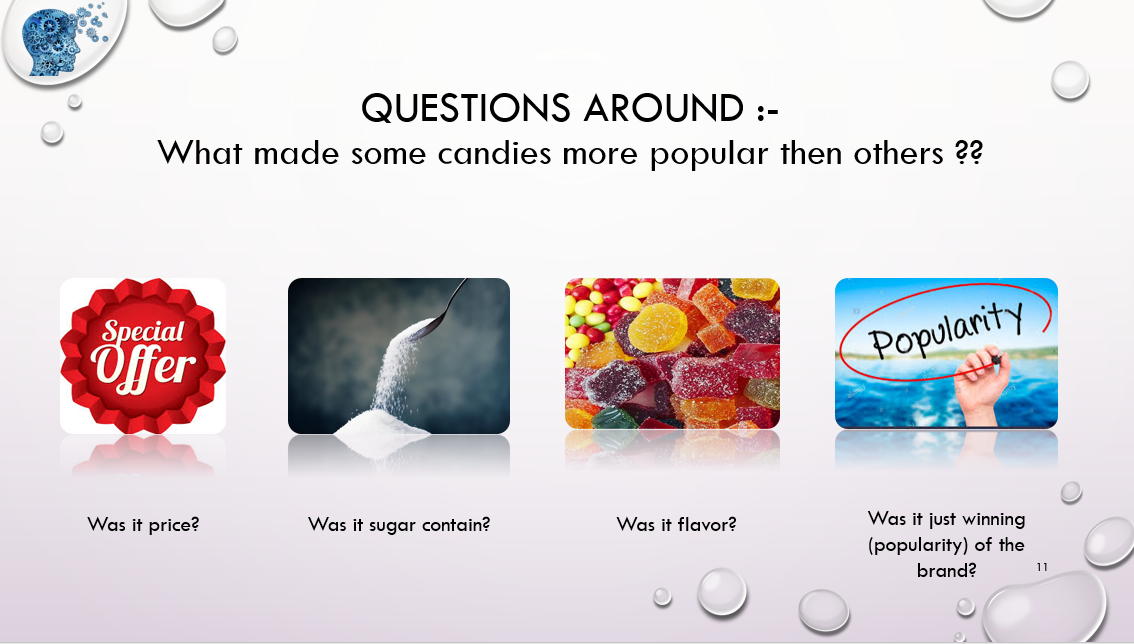

##### Lets See what are the top 10 brands and by flavor? #####

In [18]:
df.sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winpercent1,sugarbyprice,winbyprice
52,Reese Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.72,0.65,84.18,0.84,1.11,129.31
51,Reese Miniatures,1,0,0,1,0,0,0,0,0,0.03,0.28,81.87,0.82,0.12,293.43
79,Twix,1,0,1,0,0,1,0,1,0,0.55,0.91,81.64,0.82,0.60,90.11
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.31,0.51,76.77,0.77,0.61,150.23
64,Snickers,1,0,1,1,1,0,0,1,0,0.55,0.65,76.67,0.77,0.84,117.78
53,Reese pieces,1,0,0,1,0,0,0,0,1,0.41,0.65,73.43,0.73,0.62,112.80
36,Milky Way,1,0,1,0,1,0,0,1,0,0.60,0.65,73.10,0.73,0.93,112.29
54,Reese stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,72.89,0.73,1.52,111.96
32,Peanut butter M&M,1,0,0,1,0,0,0,0,1,0.82,0.65,71.47,0.71,1.27,109.78
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.60,0.77,70.74,0.71,0.79,92.22


# Observations: 

## Overall Win% by candy ##

- Top 20 Win%s: 

| **Candy**                  | **Win%** |
| -------------------------- | ---- |
| Reese Peanut Butter cup    | 84.2 |   
| Reese  Miniatures          | 81.9 |   
| Twix                       | 81.6 |   
| Kit Kat                    | 76.8 |   
| Snickers                   | 76.7 |   
| Reese pieces               | 73.4 |   
| Milky Way                  | 73.1 |   
| Reese  stuffed with pieces | 72.9 |   
| Peanut butter M&M          | 71.5 |   
| Nestle Butterfinger        | 70.7 |   
| Peanut M&Ms                | 69.5 |   
| 3 Musketeers               | 67.6 |   
| Starburst                  | 67.0 |   
| 100 Grand                  | 67.0 |    
| M&M                        | 66.6 |     
| Nestle Crunch	             | 66.5 |   
| Rolo	                     | 65.7 |   
| Milky Way Simply Caramel   | 64.4 |  
| Skittles original	         | 63.1 |  
| Hershey Krackel	         | 62.3 |  


In [19]:
df1=('competitorname','sugarpercent','pricepercent', 'winpercent','winpercent1','sugarbyprice','winbyprice')

# Observations:

- Top 10 brands are :

     - ReeseÕs Peanut Butter cup
     - ReeseÕs Miniatures
     - Twix
     - Kit Kat
     - Snickers
     - ReeseÕs pieces
     - Milky Way
     - ReeseÕs stuffed with pieces
     - Peanut butter M&MÕs
     - Nestle Butterfinger

- All Top 10 brands are in Chocolate Flavor

# Lets See any Non-Chocolaty competitors are winner or not?

In [20]:
df[df['chocolate']==0].sort_values(by=['winpercent1', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winpercent1,sugarbyprice,winbyprice
68,Starburst,0,1,0,0,0,0,0,0,1,0.15,0.22,67.04,0.67,0.69,304.72
60,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,63.09,0.63,4.28,286.75
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.07,0.12,59.86,0.60,0.59,516.07
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.47,0.47,57.12,0.57,1.00,122.84
41,Nerds,0,1,0,0,0,0,1,0,1,0.85,0.32,55.35,0.55,2.61,170.32
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.94,0.22,55.10,0.55,4.28,250.47
73,Swedish Fish,0,1,0,0,0,0,0,0,1,0.60,0.76,54.86,0.55,0.80,72.66
31,Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.27,0.28,52.91,0.53,0.96,189.65
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.07,0.12,52.83,0.53,0.59,455.40
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34,0.52,1.77,102.43


# Observations:

- Top 10 non-chocolaty brands:

    - Starburst
    - Skittles original
    - Sour Patch Kids
    - Haribo Gold Bears
    - Nerds
    - Skittles wildberry
    - Swedish Fish
    - Lifesavers big ring gummies
    - Sour Patch Tricksters
    - Air Heads

- Sour Patch Kids - has highest "winbyprice" with low price. Hence its favourite brand.


# Who is the win by price competitors? #

In [21]:
df.sort_values(by=['winbyprice', 'winpercent1'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winpercent1,sugarbyprice,winbyprice
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.17,0.01,45.74,0.46,15.82,4157.89
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.09,0.02,37.72,0.38,4.04,1640.10
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.13,0.03,43.09,0.43,3.74,1267.32
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.73,0.03,39.46,0.39,21.53,1160.60
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.57,0.06,34.58,0.35,9.81,596.19
22,Hershey Kisses,1,0,0,0,0,0,0,0,1,0.13,0.09,55.38,0.55,1.37,595.43
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.07,0.12,59.86,0.60,0.59,516.07
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.07,0.12,52.83,0.53,0.59,455.40
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.73,0.07,29.70,0.30,10.61,430.49
59,Sixlets,1,0,0,0,0,0,0,0,1,0.22,0.08,34.72,0.35,2.72,428.67


# Observation: 

- Best value brand 
    - Tootsie Roll Midgies is followed by Pixie Sticks and Fruit Chews


# Lets see performance of Sugar candies:

In [22]:
df.sort_values(by=['sugarpercent', 'winpercent1'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winpercent1,sugarbyprice,winbyprice
54,Reese stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,72.89,0.73,1.52,111.96
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.96,0.86,64.35,0.64,1.12,74.83
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.96,0.77,33.44,0.33,1.26,43.60
60,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,63.09,0.63,4.28,286.75
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.94,0.22,55.10,0.55,4.28,250.47
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34,0.52,1.77,102.43
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.91,0.45,46.78,0.47,2.00,103.27
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.91,0.32,38.01,0.38,2.79,116.96
84,Whoppers,1,0,0,0,0,1,0,0,1,0.87,0.85,49.52,0.50,1.03,58.40
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.87,0.32,46.41,0.46,2.68,142.81


# Observations: 

Top 3 Sugar based brands:
- Reese stuffed with pieces
- Milky Way Simply Caramel
- Sugar Babies

# Candies having both Chocolaty and Fruity taste?

In [23]:
df[(df['chocolate']==1)&(df['fruity']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winpercent1,sugarbyprice,winbyprice
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.6,0.32,48.98,0.49,1.86,150.72


# Observation:

- Tootsie Pop contains both the flavor - Chocolaty and Fruity
        -Win by Price is 150.715854 


# Observations  Summary:

- Tootsie Roll Midgies is best value brand with winbyprice 4157.886182  
- Sour Patch Kids is at place to interms of winbyprice 516.068948 with Fruity + Pluribus falvor. Also it has non-chocolaty       flavour
- ReeseÕs Miniatures is leading brand in Chocolate flavor candy with winbyprice as 293.427434
- Tootsie Pop having dual test of Chocolate and Fruit

**Takeway:** top 3 Winbyprice shows popularity towards Pluribus, Chocolate & Fruity flavour.


####  Checking correlation between attributes ####

In [24]:
# Correlation #

df.corr()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winpercent1,sugarbyprice,winbyprice
chocolate,1.00,-0.74,0.25,0.38,0.25,0.34,-0.34,0.60,-0.34,0.10,0.50,0.64,0.64,-0.16,-0.03
fruity,-0.74,1.00,-0.34,-0.40,-0.27,-0.27,0.39,-0.52,0.30,-0.03,-0.43,-0.38,-0.38,0.14,0.01
caramel,0.25,-0.34,1.00,0.06,0.33,0.21,-0.12,0.33,-0.27,0.22,0.25,0.21,0.21,-0.12,-0.14
peanutyalmondy,0.38,-0.40,0.06,1.00,0.21,-0.02,-0.21,0.26,-0.21,0.09,0.31,0.41,0.41,-0.15,-0.13
nougat,0.25,-0.27,0.33,0.21,1.00,-0.09,-0.14,0.52,-0.31,0.12,0.15,0.20,0.20,-0.08,-0.09
crispedricewafer,0.34,-0.27,0.21,-0.02,-0.09,1.00,-0.14,0.42,-0.22,0.07,0.33,0.32,0.32,-0.11,-0.10
hard,-0.34,0.39,-0.12,-0.21,-0.14,-0.14,1.00,-0.27,0.01,0.09,-0.24,-0.31,-0.31,0.31,0.03
bar,0.60,-0.52,0.33,0.26,0.52,0.42,-0.27,1.00,-0.59,0.10,0.52,0.43,0.43,-0.20,-0.18
pluribus,-0.34,0.30,-0.27,-0.21,-0.31,-0.22,0.01,-0.59,1.00,0.05,-0.22,-0.25,-0.25,0.13,0.17
sugarpercent,0.10,-0.03,0.22,0.09,0.12,0.07,0.09,0.10,0.05,1.00,0.33,0.23,0.23,0.17,-0.24


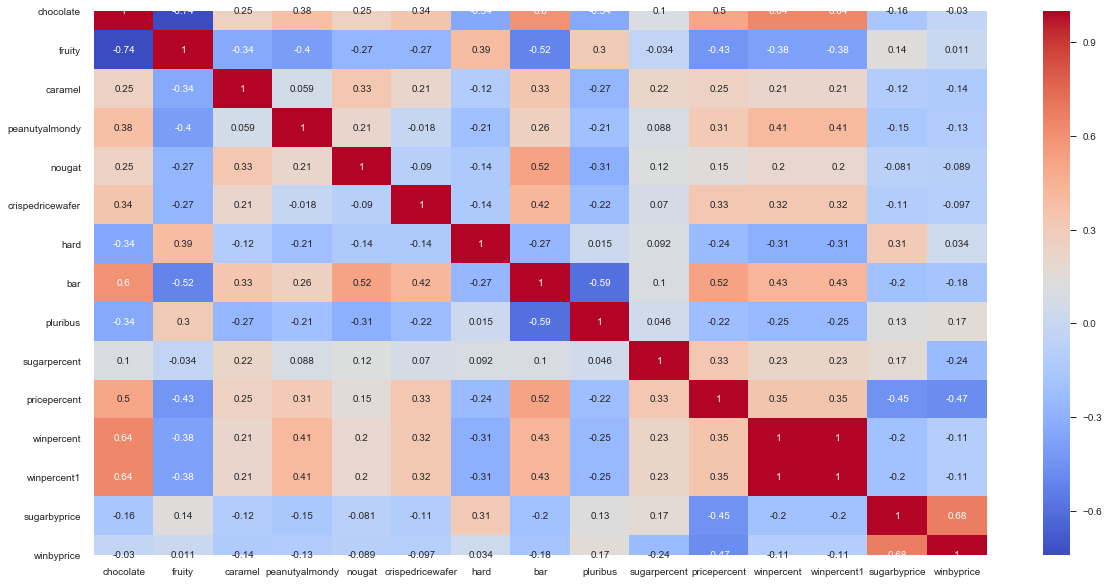

In [25]:
plt.figure(figsize = (20,10))        

sns.heatmap( df.corr(),cmap = 'coolwarm',annot=True );

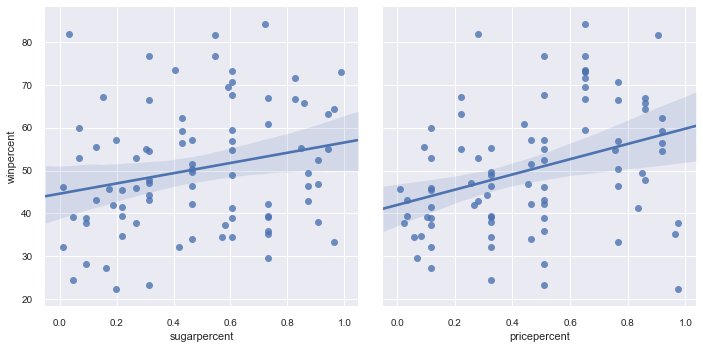

In [26]:
# Pairwise correlation between Win% with Sugar% and pirce%
sns.pairplot(df, x_vars=['sugarpercent','pricepercent'], y_vars='winpercent', height=5, aspect=1, kind='reg')

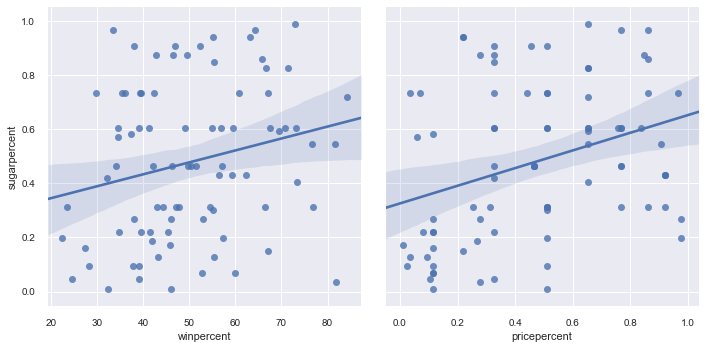

In [27]:
sns.pairplot(df, x_vars=['winpercent','pricepercent'], y_vars='sugarpercent', height=5, aspect=1, kind='reg')

### Observations:

Here we can say from above pairwise correlation charts: there is no stron liner relationship between Win%, Sugar% and Price%

## Overall EDA obervations: ##

- Based on the EDA we can see below are the attributes preferred :
    - Chocolate
    - Fruity
    - Pluribus
- This is not giving us clear idea specific attribute
- Lets use machine learning application to deep dive on the objective

<a id=section5></a>
## Applying Machine Learning Applications ##

<a id=section501></a>
### Applying Machine Learning Technique : 1 : Linear Regression ###


#### Linear Regression #### 

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

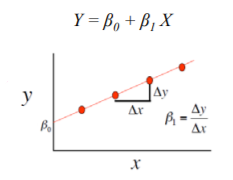

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
  
- __forecasting__ an effect, and
 
- __trend__ forecasting.
  


**Perform LR with 80:20 split**

In [28]:
feature_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
x = df[feature_cols]
y= df.winpercent 

**Splitting X and y into training and test datasets**



In [29]:
# Preparation of X_train, y_train, X_test, y_test

from sklearn.model_selection import train_test_split
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [30]:
X_train, X_test, y_train, y_test = split(x,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (68, 9)
y_train shape:  (68,)

Test cases as below
X_test shape:  (17, 9)
y_test shape:  (17,)


In [31]:
def linear_reg( x, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(x,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                 # fit the model to the training data (learn the coefficients)
        print('Train cases as below')
        print('X_train shape: ',X_train.shape)
        print('y_train shape: ',y_train.shape)
        print('\nTest cases as below')
        print('X_test shape: ',X_test.shape)
        print('y_test shape: ',y_test.shape)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(x_test)        # make predictions on the testing set

        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))       # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [32]:
linreg = linear_reg(X_train,y_train)

print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 37.93741971768415
Coefficients: [17.9497239  10.28456432  0.64812232 10.0975066  13.18577346 14.27945161
 -7.40647261 -5.19515974 -2.39298155]


In [33]:
coef = linreg.coef_.tolist() # storing coefficient as list in coef
coef

[17.949723899964514,
 10.284564315506424,
 0.6481223157790419,
 10.097506603562154,
 13.185773462822908,
 14.279451610532584,
 -7.406472613965985,
 -5.1951597383610935,
 -2.392981549050286]

In [34]:
#coef.insert(0, linreg.intercept_) # inserting the intercept value in coef list at 0 position
coef

[17.949723899964514,
 10.284564315506424,
 0.6481223157790419,
 10.097506603562154,
 13.185773462822908,
 14.279451610532584,
 -7.406472613965985,
 -5.1951597383610935,
 -2.392981549050286]

In [35]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

chocolate 17.949723899964514
fruity 10.284564315506424
caramel 0.6481223157790419
peanutyalmondy 10.097506603562154
nougat 13.185773462822908
crispedricewafer 14.279451610532584
hard -7.406472613965985
bar -5.1951597383610935
pluribus -2.392981549050286


#### Linear Equation with 80:20 (Train and Test) data ####

***y = 37.94 + 17.95 * chocolate + 10.28 * fruity + 0.65 * caramel + 10.1 * peanutyalmondy + 13.18 * nougat + 14.27 * crispedricewafer - 7.41 * hard - 5.19 * bar - 2.39 * pluribus***

In [36]:
# ### Using the Model for Prediction

# In[32]:

y_pred_train = linreg.predict(X_train) 
y_pred_test = linreg.predict(X_test)

In [37]:
# <a id=section4011></a>
### 4.1.1 Model Evaluation using metrics

# #### 1. Computing the MAE for our winprice predictions

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))


MAE for training set is 8.094423876260324
MAE for test set is 9.824327456113235


In [38]:
# #### 2. Computing the MSE for our winprice predictions


MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)


print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))


MSE for training set is 102.9733219515013
MSE for test set is 141.70627963075162


In [39]:
# #### 3. Computing the RMSE  for our winprice predictions


RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))


print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))


RMSE for training set is 10.147577146861279
RMSE for test set is 11.904044675266958


In [40]:
# #### 4. Model Evaluation using Rsquared value


yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)


0.5268760034628159 -0.0814262777992778


In [41]:
VIF= 1/(1-r_squared)
VIF

2.1136108236298417

### Observations: LR 

#**Observations for (80:20)training and testing data**
 1. We could see that the candies which contains chocolate is 17.95 percentage points higher in terms of winpercent compared to candies with no chocolate. 
 2. We also observed that fruity taste has a relatively high positive coefficient which contradicts our correlation heatmap results wherein it is inversely proportional with winning percentage. This might be caused by multicollinearity since we also found out from the correlation heatmap that chocolate and fruity has a strong negative correlation.
 3. We got the RMSE for test data 11.9 and RSquared value is 0.5268, so we can say that  52.68% of the variance of winpercent can be explained by the factors we have used. 
 4. Also we got VIF 2.11 we can say that there is no multicolinearity present in the model.

<a id=section502></a>
### Applying Machine Learning Technique : 2 : PCA ###

#### Principal Components Analysis #### 

PCA is a method used for __compressing__ a lot of data into something that captures the __essence__ of the _original data_.
- It reduces the dimension of your data with the __aim of retaining__ as _much information as possible_. 
- Calculated efficiently with computer programs
- This method combines __highly correlated variables__ together to form a smaller number of an artificial set of variables.<br/>   
- These artificial set of variables are called __'principal components'__ that account for __most variance__ in the data.

This image below is an example for __visualization__, as how _different dimensions are arranged_.
As the __dimensionality increase__, the __complexity in visualization increases__.
In the image below, we can see that in 
- _1 dimension we have 10 positions which is easy to read and understand_.
- _2 dimensions is having 100 positions, it is still good_.
- _3 dimensions is having 1000 positons, it is now a bit difficult to read, as we have to check through 3 corners to understand the data well_.

__Note__ : Though we can go for __N-Dimensions__ (N=1,2,3,.....,1000,....,N), but __4-D and above__ cannot be drawn on a piece of paper as 1-D, 2-D and 3-D.

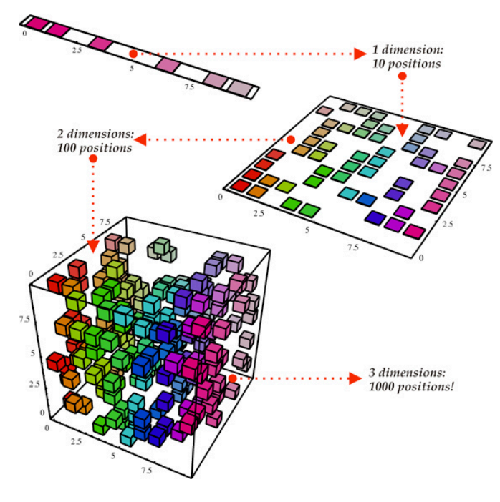

**PCA is a method that brings together:**
- A measure of how each variable is associated with one another. (Covariance matrix.)
- The directions in which our data are dispersed. (Eigenvectors.)
- The relative importance of these different directions. (Eigenvalues.)

**Perform PCA**
- We do have some correlation between features. We can use PCA for treating correlation as well as dimensionality reduction.

***scikit has 4 steps -> import, instantiate, fit, transform***

In [42]:
df = pd.read_csv('candy-data.csv', encoding='utf-8')
df.drop_duplicates(inplace=True) # drop duplicates if any.
df.shape # num rows x num columns.

(85, 13)

In [43]:
df['winpercent'] = df['winpercent']/100

In [44]:
df['sugarbyprice'] = df['sugarpercent'].div(df['pricepercent']) # higher value means the candy is sweet as well as cheap.
df['winbyprice'] = df['winpercent'].div(df['pricepercent']) # higher value means the candy is more liked as well as cheap.

In [45]:
# Importing the PCA module. 

from sklearn.decomposition import PCA # import.
pca = PCA(svd_solver='randomized', random_state=123) #instantiate.
pca.fit(df.drop('competitorname', axis=1)) # fit.

PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
    svd_solver='randomized', tol=0.0, whiten=False)

**Scree Plot.**

- The scree plot is used to determine the number of factors to retain in an exploratory factor analysis or principal components   to keep in a principal component analysis.

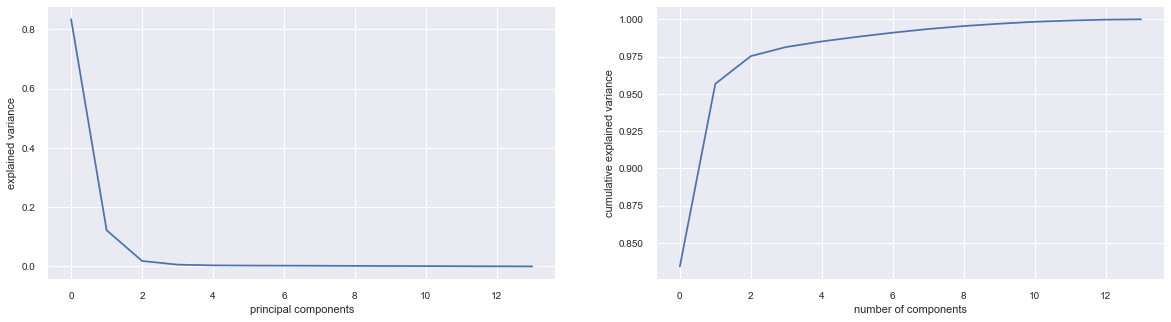

In [46]:
# Making the screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (20,5))
ax = plt.subplot(121)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('principal components')
plt.ylabel('explained variance')

ax2 = plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

* Observations: First 2 or 3 components are suggested by using the elbow method.

**Percentage of Variance retained.**

In [47]:
# what percentage of variance in data can be explained by first 2,3 and 4 principal components respectively?
(pca.explained_variance_ratio_[0:2].sum().round(3),
pca.explained_variance_ratio_[0:3].sum().round(3),
pca.explained_variance_ratio_[0:4].sum().round(3))

(0.957, 0.975, 0.981)

**Visualize Principal Components Loadings.**

In [48]:
# we'll use first 2 principal components as it retains 95% of variance.

df_pca_2_comp = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':df.drop(
                              'competitorname', axis=1).columns})

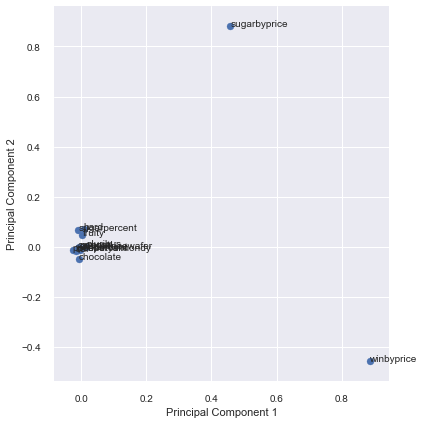

In [49]:
# we can visualize what the principal components seem to capture.

fig = plt.figure(figsize = (6,6))
plt.scatter(df_pca_2_comp.PC1, df_pca_2_comp.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pca_2_comp.Feature):
    plt.annotate(txt, (df_pca_2_comp.PC1[i],df_pca_2_comp.PC2[i]))
plt.tight_layout()
plt.show()

Except `sugarbyprice` and `winbyprice`, all the other features seem to be clustered.

**Transform Data.**

In [50]:
df_pca = pca.transform(df.drop('competitorname', axis=1)) # our data transformed with new features as principal components.
df_pca = df_pca[:, 0:2] # Since we require first two principal components only.

**Scale Data.**

In [51]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_s = standard_scaler.fit_transform(df_pca) # s in df_s stands for scaled.

**Visualize Principal Components.**

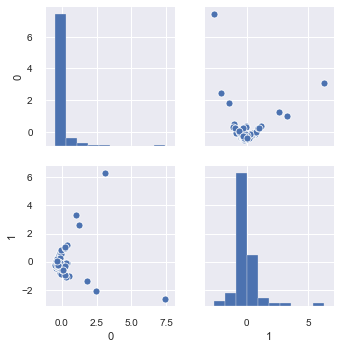

In [52]:
sns.pairplot(pd.DataFrame(df_s)) # Try to get some intuition of data.

* Observation: One cluster is very clearly visible. Seems to me that the second cluster will contain the data points not in the                first cluster. Two clusters might suffice.

<a id=section503></a>
### Applying Machine Learning Technique : 3: K-Mean###

#### Clustering #### 

Clustering is the task of __dividing the population__ or __data points__ into _a number of groups_ such that _data points in the same groups are more similar to other data points in the same group_ than those in other groups. 
> __In simple words, the aim is to segregate groups with similar traits and assign them into clusters__. 

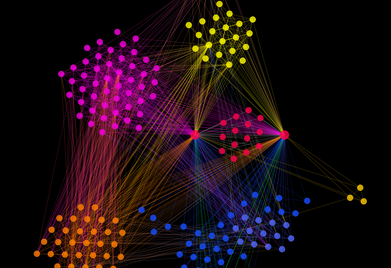

Let’s understand this with an example.<br>
1. Suppose, you are the __head of a rental store__ and wish to __understand preferences__ of your costumers to __scale up your business__. 
2. Is it possible for you to look at _details of each costumer and devise a unique business strategy_ for each one of them? __Definitely not__. 
3. But, what you can do is to __cluster__ all of your _costumers into say 10 groups based on their purchasing habits_ and use a __separate strategy__ for _costumers in each of these 10 groups_. 
4. This is what we call __clustering__.


**Perform K-Mean Clustering:**

K-means clustering is a type of __unsupervised learning__, which is used when you have __unlabeled data (i.e., data without defined categories or groups)__. 
> __The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K__. <br>

- The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. <br>
- Data points are clustered based on feature similarity.<br>

The results of the __K-means clustering algorithm__ are:
1. The centroids of the K clusters, which can be used to label new data
2. Labels for the training data (each data point is assigned to a single cluster)![image.png](https://cdn-images-1.medium.com/max/716/1*WkU1q0Cuha2QKU5JnkcZBw.gif)

## Choosing K


One of the metrics that is commonly used to compare results across different values of 'K' is the __mean distance between data points and their cluster centroid__. 
- Since _increasing the number of clusters will always reduce the distance to data points, increasing K will always decrease this metric, to the extreme of reaching zero when K is the same as the number of data points_. 
Thus, this metric cannot be used as the sole target. 
Instead, mean distance to the centroid as a function of K is plotted and the __"elbow point,"__ where the __rate of decrease sharply shifts__, can be used to roughly __determine K__.

A number of other techniques exist for validating K, including __cross-validation__, __information criteria__, the __information theoretic jump method__, the __silhouette method__, and the __G-means algorithm__. In addition, monitoring the distribution of data points across groups provides __insight__ into how the _algorithm is splitting the data for each K_.!

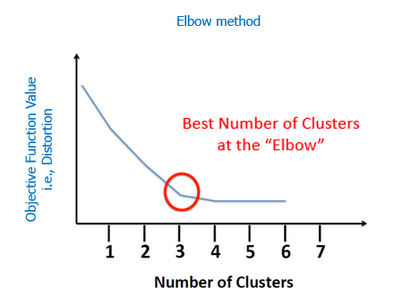

* Lets understand any clustering is possible in the data? *

Hopkin's Statistic will tell us if the data is clusterable or not. If it is less than 0.5, clusters are not statistically significant.

In [53]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [54]:
hopkins(pd.DataFrame(df_s))

0.9837347865730446

**Observations:-** Hopkin's statistic showing possibility of clustering the data.

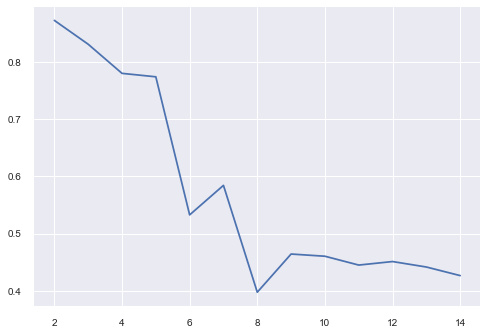

In [55]:
#Clustering: 

from sklearn.cluster import KMeans # import.

# silhouette scores to choose number of clusters.
from sklearn.metrics import silhouette_score
def sil_score(df):
    sse_ = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=123).fit(df_s) # fit.
        sse_.append([k, silhouette_score(df, kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

sil_score(df_s)

Maximum silhouette score at k=2.

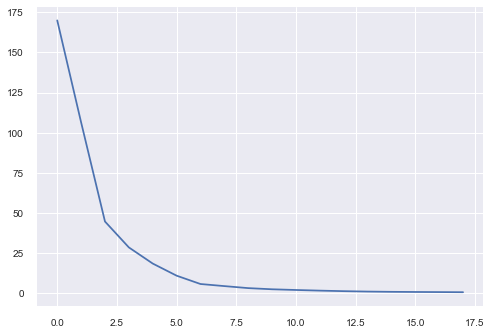

In [56]:
# sum of squared distances.

def plot_ssd(df):
    ssd = []
    for num_clusters in list(range(1,19)):
        model_clus = KMeans(n_clusters = num_clusters, max_iter=50, random_state=123)
        model_clus.fit(df)
        ssd.append(model_clus.inertia_)
    plt.plot(ssd)

plot_ssd(df_s)

**Observations:-** Elbow seems to form at 2.

* K-Means with 2 clusters.

In [57]:
# K-means with K=2.
km2c = KMeans(n_clusters=2, max_iter=50, random_state=93)
km2c.fit(df_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=93, tol=0.0001, verbose=0)

In [58]:
# creation of data frame with original features for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(df)
dfkm2c = pd.concat([df_dummy, pd.Series(km2c.labels_)], axis=1)
dfkm2c.rename(columns={0:'Cluster ID'}, inplace=True)
# dfkm2c.head()

In [59]:
# creation of data frame with features as principal components for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(pd.DataFrame(df_s))
dfpcakm2c = pd.concat([df_dummy, pd.Series(km2c.labels_)], axis=1)
dfpcakm2c.columns = ['PC1', 'PC2', 'Cluster ID']

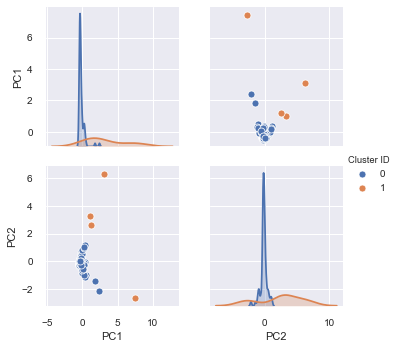

In [60]:
sns.pairplot(data=dfpcakm2c, vars=['PC1', 'PC2'], hue='Cluster ID')

**K-means with 5 clusters.**

In [61]:
# K-means with K=5.
km5c = KMeans(n_clusters=5, max_iter=50, random_state=123)
km5c.fit(df_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [62]:
# creation of data frame with original features for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(df)
dfkm5c = pd.concat([df_dummy, pd.Series(km5c.labels_)], axis=1) # df-dataframe, km-kmeans, 5c-5clusters.
dfkm5c.rename(columns={0:'Cluster ID'}, inplace=True)
# dfkm5c.head()

In [63]:
# creation of data frame with features as principal components for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(pd.DataFrame(df_s))
dfpcakm5c = pd.concat([df_dummy, pd.Series(km5c.labels_)], axis=1)
dfpcakm5c.columns = ['PC1', 'PC2', 'Cluster ID']

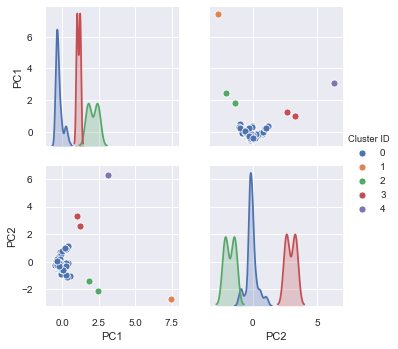

In [64]:
sns.pairplot(data = dfpcakm5c, vars=['PC1', 'PC2'], hue='Cluster ID')

#### Analysis of Clusters ####

* Let's see how cluster 0 differs from the rest.

In [65]:
dfkm5c.groupby('Cluster ID').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
Cluster ID,,,,,,,,,,,,,,
0,0.46,0.44,0.18,0.18,0.09,0.09,0.15,0.27,0.49,0.48,0.50,0.51,1.19,1.52
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.17,0.01,0.46,15.82,41.58
2,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.11,0.03,0.40,3.89,14.54
3,0.00,0.50,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.65,0.06,0.32,10.21,5.13
4,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.73,0.03,0.39,21.53,11.61


In [66]:
dfkm5c[dfkm5c['Cluster ID']!=0]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice,Cluster ID
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.73,0.03,0.39,21.53,11.61,4
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.13,0.03,0.43,3.74,12.67,2
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.09,0.02,0.38,4.04,16.40,2
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.73,0.07,0.30,10.61,4.30,3
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.57,0.06,0.35,9.81,5.96,3
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.17,0.01,0.46,15.82,41.58,1


**Observations:-**

1. It is to be noted that only Cluster ID 4 (Dum Dums) and 1 (Tootsie Roll Midgies) are far away from Cluster ID 0.<br>
2. 'Dum Dums' and 'Tootsie Roll Midgies' are sort of opposite of each other. The first one is fruity and the second one chocolaty.<br>
3. Cluster ID 0 contains competitors which are mostly chocolaty, sugary and more favorable. Cluster ID 1, although being chocolaty has a low sugar percentile.<br>
4. All the chocolates which don't belong to Cluster ID 0 have made the top 10 list of `winbyprice`. They are all cheap.

Let's put clusters other than 0 into one cluster and then analyze again.

In [67]:
dfkm5c['Cluster ID'] = dfkm5c['Cluster ID'].map(lambda x: 1 if (x!=0) else 0)

In [68]:
dfkm5c.groupby('Cluster ID').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
Cluster ID,,,,,,,,,,,,,,
0,0.46,0.44,0.18,0.18,0.09,0.09,0.15,0.27,0.49,0.48,0.50,0.51,1.19,1.52
1,0.17,0.50,0.00,0.00,0.00,0.00,0.50,0.00,0.83,0.40,0.04,0.38,10.92,15.42


**Observations:-** Cluster ID 0 contains competitors which are more chocolaty and more pricey.

#### Predicting the win percentage ####

In [69]:
# Scaling

X = df.drop(['competitorname', 'winpercent', 'sugarpercent', 'pricepercent', 'sugarbyprice', 'winbyprice'], axis=1)
y = df['winpercent']

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [70]:
# Cross-Validation:-

from sklearn import linear_model # import.
lr_rdg = linear_model.Ridge(random_state=123) # instantiate.

# Perform cross-validation.
from sklearn.model_selection import GridSearchCV
hyperparameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
model_cv = GridSearchCV(estimator = lr_rdg, param_grid = hyperparameters, cv=10, scoring= 'neg_mean_absolute_error',return_train_score=True)
#lr_rdg.get_params().keys() # hyperparameters that we can set.

model_cv.fit(X, y) # fit.

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=123,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=0)

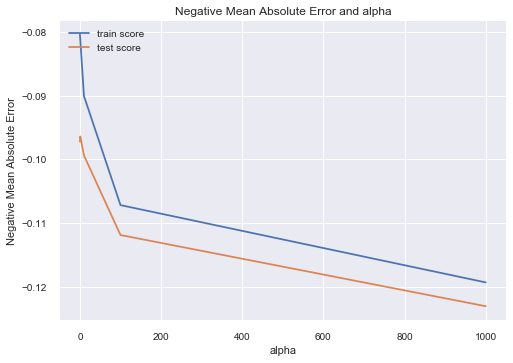

In [71]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results.head()

# Plotting mean test and train scoes with alpha.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Ridge Linear Regression.**

In [72]:
model_cv.best_params_

{'alpha': 1}

In [73]:
alpha = 1
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [74]:
# Result:

ridge.intercept_ # constant term.

0.3727885990571671

In [75]:
for x,y in zip(X.columns, ridge.coef_): # coefficients of features.
    print(x, y*100)

chocolate 17.395113450849347
fruity 7.72063968640181
caramel 2.9072336870698576
peanutyalmondy 9.09428184646823
nougat 1.376495256219395
crispedricewafer 7.301821467840015
hard -4.44249782763022
bar 0.7309590882068188
pluribus -0.14235867560122606


**Observations:-**

Linear Equation with ridge method
y = 37.27 + 17.39 * chocolate + 7.72 * fruity + 2.91 * caramel + 9.09 * peanutyalmondy + 1.38 * nougat + 7.30 * crispedricewafer - 4.44 * hard + 0.73 * bar - 0.14 * pluribus

<a id=section6></a>
## Conclusion

**LR:-** 

1) As per the evaluation with (80:20) training and testing data Chocolate is the most important attribute of a candy              followed by Crispedricewafer, Peanutyalmondy and Nougat. 
2) As per the evaluation with ridge method Chocolate is the most important attribute of a candy followed by peanutyalmondy,      Fruity and crispedricewafer.

**PCA:**
1) Other than sugarbyprice rest all are forming single cluster
2) After transformation, its observed possibility of one more cluster

**Cluster&K-Mean:-**
1) Mainly cluser contains Chocolaty brands. Cluster 0 has Sugar contain whereas other brands which are not belong to cluster 0 who are part of top 10 winbyprice are all cheaper.

Overall recommendation is in favor of Chocolate attribute. 



 ## THANK YOU ##